In [11]:
import sys
sys.path.insert(0, "../python")

from ionization import ionization
from ionization import adk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

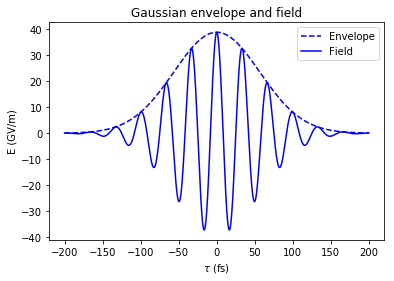

In [12]:
# Test Gaussian pulses
I = 2
t = np.arange(-200, 200, .1)
tau = 100
f = 3*10**-2
Eenv = abs(ionization.gaussian_envelope(I, t, tau))
Efld = ionization.gaussian_field(I, t, f, tau).real

plt.plot(t, Eenv, 'b--', t, Efld, 'b-')
plt.ylabel('E (GV/m)')
plt.xlabel(r'$\tau$ (fs)')
plt.title('Gaussian envelope and field')
plt.legend(['Envelope', 'Field'])
plt.show()

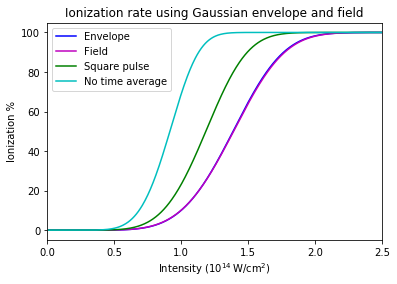

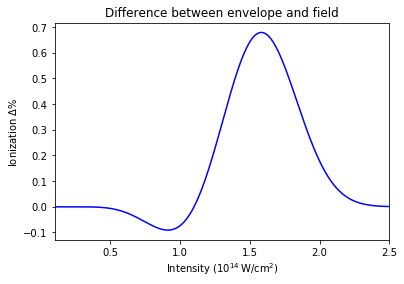

In [56]:
# Test multidimensional input to ionization fraction
I = np.arange(0.01, 5, .005)
t = np.arange(-200, 200, 1)
tau = 100
f = 3*10**-1

def ionization_plot(EI, I, t, f, tau, Z, chirp=0):
    IN = np.size(I)
    env = np.zeros(IN)
    fld = np.zeros(IN)
    box = np.zeros(IN)
    boxstat = np.zeros(IN)
    Ebox = np.zeros(np.size(t))
    for x in range(0, IN):
        Eenv = abs(ionization.gaussian_envelope(I[x], t, tau))
        Efld = abs(ionization.gaussian_field(I[x], t, f, tau).real)
        Ebox[abs(t) < 50] = ionization.field_from_intensity(I[x])
        env[x] = adk.ionization_frac(EI, Eenv, t, Z, 0, 0, True)*100
        fld[x] = adk.ionization_frac(EI, Efld, t, Z, 0, 0, False)*100
        box[x] = adk.ionization_frac(EI, Ebox, t, Z, 0, 0, True)*100
        boxstat[x] = adk.ionization_frac(EI, Ebox, t, Z, 0, 0, False)*100
    return [env, fld, box, boxstat]

H = ionization_plot(13.5984, I, t, f, tau, 1)

plt.plot(I, H[0], 'b-',I, H[1], 'm-', I, H[2], 'g-', I, H[3], 'c-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization rate using Gaussian envelope and field')
plt.legend(['Envelope', 'Field', 'Square pulse', 'No time average'])
plt.xlim([0, 2.5])
plt.show()

plt.plot(I, H[0]-H[1], 'b-')
plt.ylabel(r'Ionization $\Delta$%')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Difference between envelope and field')
plt.xlim([0.1, 2.5])
plt.show()

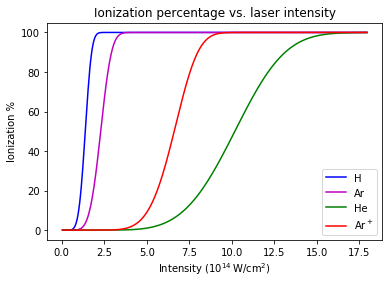

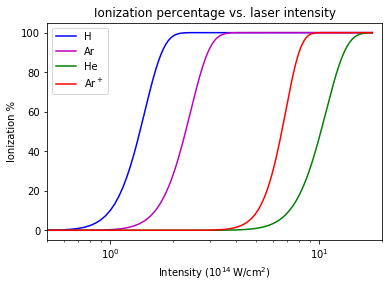

In [46]:
def ionization_plot(EI, I, t, f, tau, Z, chirp=0):
    IN = np.size(I)
    env = np.zeros(IN)
    for x in range(0, IN):
        Eenv = abs(ionization.gaussian_envelope(I[x], t, tau))
        env[x] = adk.ionization_frac(EI, Eenv, t, Z, 0, 0, True)
    return env
# Ionization rate plots
I = np.arange(0.05, 18, 0.05)
t = np.arange(-200, 200, 1)
tau = 100
f = 3*10**-1

H = ionization_plot(13.5984, I, t, f, tau, 1)*100
He = ionization_plot(24.5874, I, t, f, tau, 1)*100
Ar = ionization_plot(15.7596, I, t, f, tau, 1)*100
Ar2 = ionization_plot(27.62965, I, t, f, tau, 2)*100

plt.plot(I, H, 'b-', I, Ar, 'm-', I, He, 'g-', I, Ar2, 'r-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization percentage vs. laser intensity')
plt.legend(['H','Ar','He','Ar$^+$'])
plt.show()

plt.semilogx(I, H, 'b-', I, Ar, 'm-', I, He, 'g-', I, Ar2, 'r-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization percentage vs. laser intensity')
plt.legend(['H','Ar','He','Ar$^+$'])
plt.xlim([0.5,20])
plt.show()

/home/rariniello/anaconda3/envs/CU-PWFA/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/home/rariniello/anaconda3/envs/CU-PWFA/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/home/rariniello/anaconda3/envs/CU-PWFA/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
/home/rariniello/anaconda3/envs/CU-PWFA/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/home/rariniello/anaconda3/envs/CU-PWFA/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide
/home/rariniello/anaconda3/envs/CU-PWFA/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
/home/rariniello/anaconda3/envs/CU-PWFA/lib/python3.6/site-packages/ipykernel/__main__.py:16: Runt

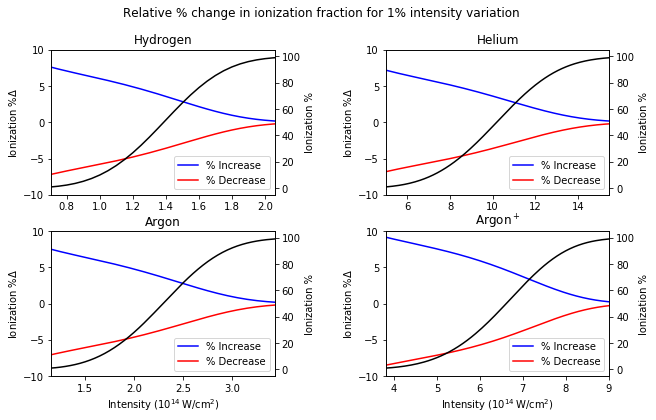

In [38]:
IUpper = I * 1.01
ILower = I * 0.99
# Hydrogen
HUpper = (ionization_plot(13.5984, IUpper, t, f, tau, 1)*100 / H - 1)*100
HLower = (ionization_plot(13.5984, ILower, t, f, tau, 1)*100 / H - 1)*100
IofH = interp1d(H, I)
# Helium
HeUpper = (ionization_plot(24.5874, IUpper, t, f, tau, 1)*100 / He - 1)*100
HeLower = (ionization_plot(24.5874, ILower, t, f, tau, 1)*100 / He - 1)*100
IofHe = interp1d(He, I)
# Argon
ArUpper = (ionization_plot(15.7596, IUpper, t, f, tau, 1)*100 / Ar - 1)*100
ArLower = (ionization_plot(15.7596, ILower, t, f, tau, 1)*100 / Ar - 1)*100
IofAr = interp1d(Ar, I)
# Argon +1
Ar2Upper = (ionization_plot(27.62965, IUpper, t, f, tau, 2)*100 / Ar2 - 1)*100
Ar2Lower = (ionization_plot(27.62965, ILower, t, f, tau, 2)*100 / Ar2 - 1)*100
IofAr2 = interp1d(Ar2, I)

plt.figure(1, figsize=(10,6))
plt.suptitle('Relative % change in ionization fraction for 1% intensity variation')
plt.subplots_adjust(hspace=.25, wspace=0.5)

plt.subplot(221)
plt.plot(I, HUpper, 'b-', I, HLower, 'r-')
plt.ylabel('Ionization %$\Delta$')
#plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Hydrogen')
plt.ylim([-10,10])
plt.legend(['% Increase','% Decrease'],bbox_to_anchor=(1, 0.30))
plt.twinx()
plt.plot(I, H, 'k-')
plt.xlim([IofH(1),IofH(99)])
plt.ylabel('Ionization %')

plt.subplot(222)
plt.plot(I, HeUpper, 'b-', I, HeLower, 'r-')
plt.ylabel('Ionization %$\Delta$')
#plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Helium')
plt.ylim([-10,10])
plt.legend(['% Increase','% Decrease'],bbox_to_anchor=(1, 0.30))
plt.twinx()
plt.plot(I, He, 'k-')
plt.xlim([IofHe(1),IofHe(99)])
plt.ylabel('Ionization %')

plt.subplot(223)
plt.plot(I, ArUpper, 'b-', I, ArLower, 'r-')
plt.ylabel('Ionization %$\Delta$')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Argon')
plt.ylim([-10,10])
plt.legend(['% Increase','% Decrease'],bbox_to_anchor=(1, 0.30))
plt.twinx()
plt.plot(I, Ar, 'k-')
plt.xlim([IofAr(1),IofAr(99)])
plt.ylabel('Ionization %')

plt.subplot(224)
plt.plot(I, Ar2Upper, 'b-', I, Ar2Lower, 'r-')
plt.ylabel('Ionization %$\Delta$')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Argon$^+$')
plt.ylim([-10,10])
plt.legend(['% Increase','% Decrease'],bbox_to_anchor=(1, 0.30))
plt.twinx()
plt.plot(I, Ar2, 'k-')
plt.xlim([IofAr2(1),IofAr2(99)])
plt.ylabel('Ionization %')

plt.show()

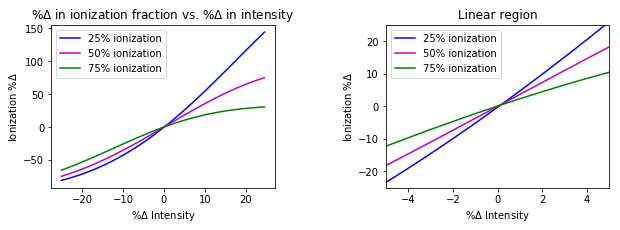

In [31]:
Iper = np.arange(0.75, 1.25, 0.005)
HofI = interp1d(I, H)
IofH = interp1d(H, I)

per = 50
Ihalf = IofH(per) * Iper
Hhalf = (ionization_plot(13.5984, Ihalf, t, f, tau, 1)*100 / per - 1)*100
Ihalf = (Ihalf / IofH(per) - 1)*100

per = 25
Iqurt = IofH(per) * Iper
Hqurt = (ionization_plot(13.5984, Iqurt, t, f, tau, 1)*100 / per - 1)*100
Iqurt = (Iqurt / IofH(per) - 1)*100

per = 75
Iuper = IofH(per) * Iper
Huper = (ionization_plot(13.5984, Iuper, t, f, tau, 1)*100 / per - 1)*100
Iuper = (Iuper / IofH(per) - 1)*100

plt.figure(2, figsize=(10,3))
plt.subplots_adjust(hspace=0.25, wspace=0.5)

plt.subplot(121)
plt.plot(Iqurt, Hqurt, 'b-', Ihalf, Hhalf, 'm-', Iuper, Huper, 'g-')
plt.ylabel('Ionization %$\Delta$')
plt.xlabel(r'%$\Delta$ Intensity')
plt.title(r'%$\Delta$ in ionization fraction vs. %$\Delta$ in intensity')
plt.legend(['25% ionization', '50% ionization', '75% ionization'])

plt.subplot(122)
plt.plot(Iqurt, Hqurt, 'b-', Ihalf, Hhalf, 'm-', Iuper, Huper, 'g-')
plt.ylabel('Ionization %$\Delta$')
plt.xlabel(r'%$\Delta$ Intensity')
plt.title(r'Linear region')
plt.legend(['25% ionization', '50% ionization', '75% ionization'])
plt.xlim([-5,5])
plt.ylim([-25,25])

plt.show()

../python/ionization/adk.py:53: RuntimeWarning: overflow encountered in true_divide
  * np.exp(-6.83089*E0/Enz)
../python/ionization/adk.py:53: RuntimeWarning: overflow encountered in multiply
  * np.exp(-6.83089*E0/Enz)
../python/ionization/adk.py:53: RuntimeWarning: invalid value encountered in multiply
  * np.exp(-6.83089*E0/Enz)
../python/ionization/adk.py:53: RuntimeWarning: overflow encountered in power
  * np.exp(-6.83089*E0/Enz)


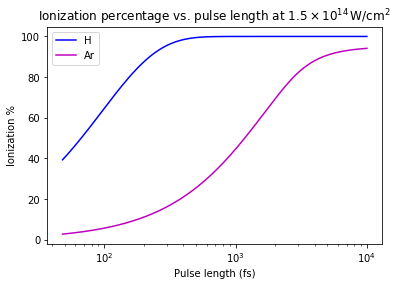

In [71]:
def ionization_plot(EI, I, t, f, tau, Z, chirp=0):
    tauN = np.size(tau)
    env = np.zeros(tauN)
    for x in range(0, tauN):
        Eenv = abs(ionization.gaussian_envelope(I, t, tau[x]))
        env[x] = adk.ionization_frac(EI, Eenv, t, Z, 0, 0, True)
    return env
# Ionization rate plots
I = 1.5
t = np.arange(-1000, 1000, 1)
tau = np.arange(10, 10000, 1)
f = 3*10**-1

H = ionization_plot(13.5984, I, t, f, tau, 1)*100
#He = ionization_plot(24.5874, I, t, f, tau, 1)*100
Ar = ionization_plot(15.7596, I, t, f, tau, 1)*100
#Ar2 = ionization_plot(27.62965, I, t, f, tau, 2)*100

plt.semilogx(tau, H, 'b-', tau, Ar, 'm-')#, tau, He, 'g-', tau, Ar2, 'r-')
plt.ylabel('Ionization %')
plt.xlabel('Pulse length (fs)')
plt.title(r'Ionization percentage vs. pulse length at $1.5\times 10^{14}\,\mathrm{W/cm}^2$')
plt.legend(['H','Ar','He','Ar$^+$'])
plt.show()

../python/ionization/adk.py:53: RuntimeWarning: overflow encountered in true_divide
  * np.exp(-6.83089*E0/Enz)
../python/ionization/adk.py:53: RuntimeWarning: invalid value encountered in multiply
  * np.exp(-6.83089*E0/Enz)


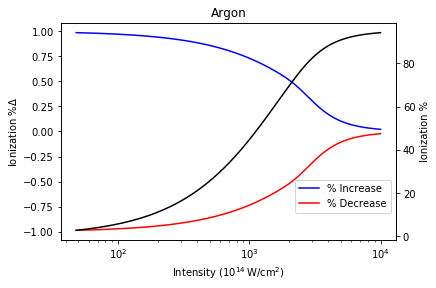

In [78]:
tauUpper = tau * 1.01
tauLower = tau * 0.99
# Argon
ArUpper = (ionization_plot(15.7596, I, t, f, tauUpper, 1)*100 / Ar - 1)*100
ArLower = (ionization_plot(15.7596, I, t, f, tauLower, 1)*100 / Ar - 1)*100
tauofAr = interp1d(Ar, tau)

plt.semilogx(tau, ArUpper, 'b-', tau, ArLower, 'r-')
plt.ylabel('Ionization %$\Delta$')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Argon')
#plt.ylim([-10,10])
plt.legend(['% Increase','% Decrease'],bbox_to_anchor=(1, 0.30))
plt.twinx()
plt.semilogx(tau, Ar, 'k-')
#plt.xlim([IofAr(1),IofAr(99)])
plt.ylabel('Ionization %')
plt.show()

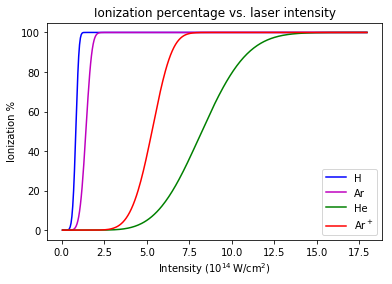

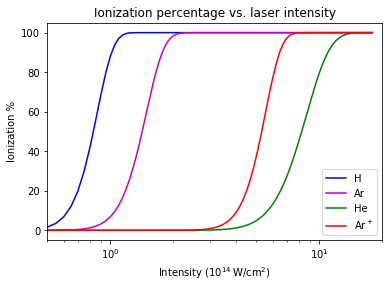

In [81]:
def ionization_plot(EI, I, t, f, tau, Z, chirp=0):
    IN = np.size(I)
    env = np.zeros(IN)
    for x in range(0, IN):
        Eenv = abs(ionization.gaussian_envelope(I[x], t, tau[x]))
        env[x] = adk.ionization_frac(EI, Eenv, t, Z, 0, 0, True)
    return env
# Ionization rate plots
I = np.arange(0.05, 18, 0.05)
t = np.arange(-500, 500, 1)
tau = 2500 / I
f = 3*10**-1

H = ionization_plot(13.5984, I, t, f, tau, 1)*100
He = ionization_plot(24.5874, I, t, f, tau, 1)*100
Ar = ionization_plot(15.7596, I, t, f, tau, 1)*100
Ar2 = ionization_plot(27.62965, I, t, f, tau, 2)*100

plt.plot(I, H, 'b-', I, Ar, 'm-', I, He, 'g-', I, Ar2, 'r-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization percentage at fixed fluence')
plt.legend(['H','Ar','He','Ar$^+$'])
plt.show()

plt.semilogx(I, H, 'b-', I, Ar, 'm-', I, He, 'g-', I, Ar2, 'r-')
plt.ylabel('Ionization %')
plt.xlabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Ionization percentage st fixed fluence')
plt.legend(['H','Ar','He','Ar$^+$'])
plt.xlim([0.5,20])
plt.show()